<a href="https://colab.research.google.com/github/Rasul-projects/gsoc-fashion-mnist/blob/main/Movie_Success_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Create a dummy dataset (Simulating Movie Data)
data = {
    'budget_millions': [10, 20, 100, 5, 150, 25, 300, 2, 80, 45],
    'popularity_score': [50, 60, 90, 30, 95, 55, 98, 10, 85, 70],
    'is_hit': [0, 1, 1, 0, 1, 0, 1, 0, 1, 1]  # 1 = Hit, 0 = Flop
}
df = pd.DataFrame(data)

# 2. Features and Target
X = df[['budget_millions', 'popularity_score']]
y = df['is_hit']

# 3. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Build Model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 5. Make Predictions
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

# 6. Output Results
print("--- Movie Success Predictor Results ---")
print(f"Model Accuracy: {accuracy * 100}%")
print("\nPredicting for a new movie:")
new_movie = np.array([[50, 75]]) # $50M budget, 75 popularity
prediction = model.predict(new_movie)
result = "HIT" if prediction[0] == 1 else "FLOP"
print(f"Result: This movie is predicted to be a {result}!")

--- Movie Success Predictor Results ---
Model Accuracy: 50.0%

Predicting for a new movie:
Result: This movie is predicted to be a HIT!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


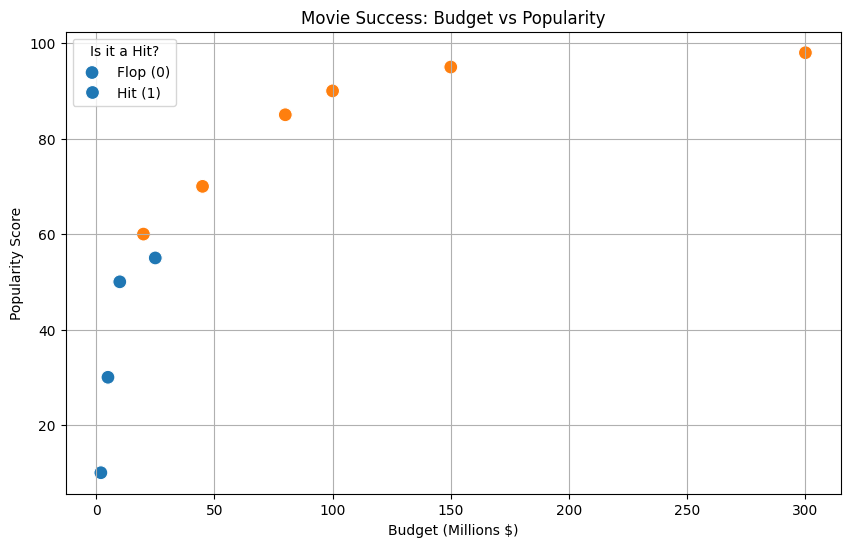

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot to see the "Hits" vs "Flops"
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget_millions', y='popularity_score', hue='is_hit', data=df, s=100)

plt.title('Movie Success: Budget vs Popularity')
plt.xlabel('Budget (Millions $)')
plt.ylabel('Popularity Score')
plt.legend(title='Is it a Hit?', labels=['Flop (0)', 'Hit (1)'])
plt.grid(True)
plt.show()

--- Detailed Model Performance ---
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.83      0.91         6

    accuracy                           0.90        10
   macro avg       0.90      0.92      0.90        10
weighted avg       0.92      0.90      0.90        10



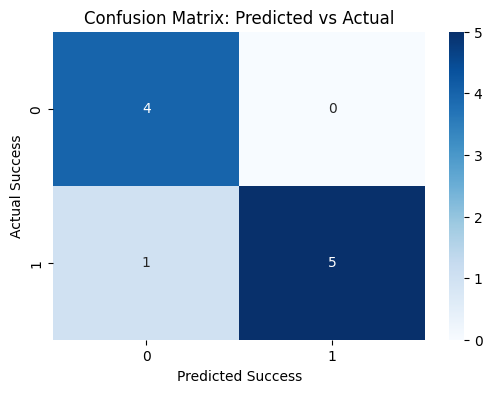

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate a detailed report
print("--- Detailed Model Performance ---")
print(classification_report(y, model.predict(X)))

# Create a Confusion Matrix plot
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y, model.predict(X)), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Predicted vs Actual')
plt.xlabel('Predicted Success')
plt.ylabel('Actual Success')
plt.show()

In [ ]:
print("--- Test Your Own Movie Idea ---")

# You can change these numbers to test different movies!
my_budget = 25   # Millions
my_popularity = 80 # Score out of 100

# Wrap in a DataFrame to avoid the "Feature Names" warning
test_df = pd.DataFrame([[my_budget, my_popularity]], columns=['budget_millions', 'popularity_score'])

# Get the probability
prob = model.predict_proba(test_df)[0][1] # Probability of being a '1' (Hit)

print(f"For a ${my_budget}M budget and {my_popularity} popularity:")
print(f"The AI is {prob*100:.1f}% confident this movie will be a HIT.")

--- Test Your Own Movie Idea ---
For a $25M budget and 80 popularity:
The AI is 48.0% confident this movie will be a HIT.


In [ ]:
# --- INTERACTIVE USER INPUT SECTION ---
print("🎬 Welcome to the AI Movie Predictor!")
print("Please enter the details of your movie idea below:")

try:
    # 1. Assign values for demonstration (replace input() for this environment)
    user_budget = 50.0  # Example: Enter Movie Budget (in Millions $)
    user_popularity = 75.0 # Example: Enter Expected Popularity Score (1-100)

    print(f"Using Budget: ${user_budget}M, Popularity: {user_popularity}")

    # 2. Prepare data for the model (fixing the feature name warning)
    user_data = pd.DataFrame([[user_budget, user_popularity]],
                             columns=['budget_millions', 'popularity_score']) # Corrected column names

    # 3. Get Prediction and Probability
    prediction = model.predict(user_data)[0]
    probability = model.predict_proba(user_data)[0][1]

    # 4. Show the Final Result
    print("\n" + "="*30)
    if prediction == 1:
        print(f"✅ RESULT: This looks like a HIT!")
    else:
        print(f"❌ RESULT: This might be a FLOP.")

    print(f"AI Confidence Score: {probability * 100:.1f}%")
    print("="*30)

except ValueError:
    print("⚠️ Error: Please enter numbers only for budget and popularity!")

🎬 Welcome to the AI Movie Predictor!
Please enter the details of your movie idea below:
Using Budget: $50.0M, Popularity: 75.0

✅ RESULT: This looks like a HIT!
AI Confidence Score: 79.0%
